<a href="https://colab.research.google.com/github/Ninjapack/ai_lab/blob/main/Lab3_20596_cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:

mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']


num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)


def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label


scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)


BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)


validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)


BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)


validation_inputs, validation_targets = next(iter(validation_data))

In [7]:
input_size = 784
output_size = 10
hidden_layer_size = 100

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

history = model.fit(
    train_data,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping],
    validation_data=(validation_inputs, validation_targets),
    verbose=2
)

Epoch 1/10
540/540 - 6s - 11ms/step - accuracy: 0.9026 - loss: 0.3376 - val_accuracy: 0.9477 - val_loss: 0.1792
Epoch 2/10
540/540 - 4s - 8ms/step - accuracy: 0.9581 - loss: 0.1388 - val_accuracy: 0.9565 - val_loss: 0.1345
Epoch 3/10
540/540 - 5s - 10ms/step - accuracy: 0.9705 - loss: 0.0976 - val_accuracy: 0.9718 - val_loss: 0.0939
Epoch 4/10
540/540 - 4s - 7ms/step - accuracy: 0.9776 - loss: 0.0734 - val_accuracy: 0.9760 - val_loss: 0.0814
Epoch 5/10
540/540 - 4s - 8ms/step - accuracy: 0.9810 - loss: 0.0602 - val_accuracy: 0.9802 - val_loss: 0.0651
Epoch 6/10
540/540 - 6s - 12ms/step - accuracy: 0.9854 - loss: 0.0469 - val_accuracy: 0.9808 - val_loss: 0.0617
Epoch 7/10
540/540 - 4s - 7ms/step - accuracy: 0.9871 - loss: 0.0403 - val_accuracy: 0.9833 - val_loss: 0.0573
Epoch 8/10
540/540 - 5s - 9ms/step - accuracy: 0.9893 - loss: 0.0330 - val_accuracy: 0.9872 - val_loss: 0.0446
Epoch 9/10
540/540 - 8s - 14ms/step - accuracy: 0.9909 - loss: 0.0296 - val_accuracy: 0.9888 - val_loss: 0.03

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


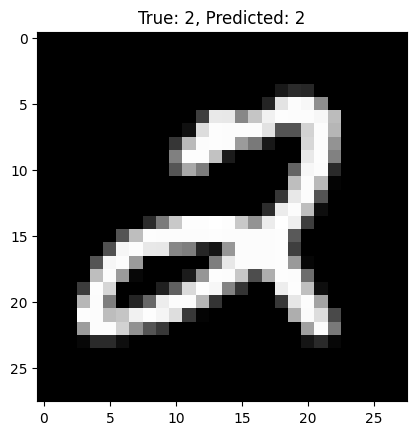

In [ ]:

for test_images, test_labels in test_data.take(1):
    sample_image = test_images[0].numpy()
    sample_label = test_labels[0].numpy()


predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)


plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f'True: {sample_label}, Predicted: {predicted_label}')
plt.show()

In [9]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.9778 - loss: 0.0820
Test accuracy: 97.78%
